Análsis superficial de Coronavirus-19
 ==========

Comienzo cargando todos los paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import datetime as dt
import datetime
from datetime import timedelta  
import urllib.request  # importar archivos web

# para tratar de poner espanol
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, format_timedelta, Locale
import locale                                    # para tratar de poner espanol
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Cargo base de datos

Saco información de la base de datos de la John Hopkins Institute, https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

Importo las bases de datos

In [2]:
confirmados = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

muertos = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

recuperados = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

print ("Bajando....")
filename, headers = urllib.request.urlretrieve(confirmados, filename="./BD/confirmados.csv")
filename, headers = urllib.request.urlretrieve(muertos, filename="./BD/muertos.csv")
filename, headers = urllib.request.urlretrieve(recuperados, filename="./BD/recuperados.csv")
print ('Bajado!')


Bajando....
Bajado!


Cargo las bases de datos

In [3]:
confirmados = pd.read_csv('./BD/confirmados.csv')
muertos = pd.read_csv('./BD/muertos.csv')
recuperados = pd.read_csv('./BD/recuperados.csv')

In [4]:
# como se ve.....
# Fechas
confirmados.columns
confirmados.head()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20'],
      dtype='object')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


corrijo parte de la base de datos

In [5]:
# Arreglo las cabeceras dado que son fechas
fechas = pd.to_datetime(confirmados.columns[4:])
lugares = confirmados.columns[:4]
confirmados.columns = list(lugares) + list(fechas)

fechas = pd.to_datetime(muertos.columns[4:])
lugares = muertos.columns[:4]
muertos.columns = list(lugares) + list(fechas)

fechas = pd.to_datetime(recuperados.columns[4:])
lugares = recuperados.columns[:4]
recuperados.columns = list(lugares) + list(fechas)

Variables constante

In [6]:
fechas = pd.to_datetime(confirmados.columns[4:])
paises_LA = list(['Argentina', 'Chile', 'Peru', 'Venezuela',
                  'Brazil', 'Mexico', 'Ecuador', 'Colombia',
                  'Bolivia', 'Cuba', 'Uruguay', 'Guatemala',
                  ])
paises_LA
# confirmados['Country/Region'].unique()


['Argentina',
 'Chile',
 'Peru',
 'Venezuela',
 'Brazil',
 'Mexico',
 'Ecuador',
 'Colombia',
 'Bolivia',
 'Cuba',
 'Uruguay',
 'Guatemala']

# Cantidad de Casos en países de interes

## Chile

In [7]:
paises = list(['Chile'
                  ])


Text(0.5, 1.0, 'Casos confirmados Coronavirus-19')

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cantidad de casos')

Text(2020-02-27 00:00:00, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar')

(737482.0, 737501.8532797527)

Text(0, 0.5, 'Cantidad de casos en log')

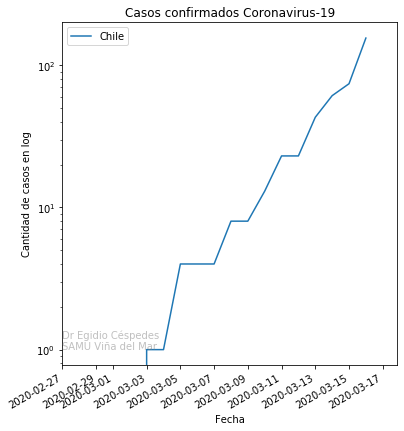

In [8]:
PAIS_Interes = confirmados.loc[
    confirmados['Country/Region'].isin(paises)].set_index('Country/Region')[fechas].T.copy()

dumm = PAIS_Interes

# fecha de interés
f_fin = dt.datetime.now()
f_inicio = dt.datetime(2020,2,27)


# Formato
dumm.plot(figsize=(6,7))
plt.legend(loc='upper left')
plt.title('Casos confirmados Coronavirus-19')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.text(f_inicio, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar',
         fontsize=10,color='gray', alpha=0.5)

plt.xlim(f_inicio, f_fin)


# escala logaritmica
plt.yscale('log')
plt.ylabel('Cantidad de casos en log')

## Vecinos

In [9]:
paises = list(['Argentina', 'Chile', 'Peru', 'Venezuela',
                  'Ecuador', 'Colombia', 'Brazil', 'Paraguay'
                  'Bolivia', 'Uruguay', 'Bolivia', 'Colombia'
                  ])

Text(0.5, 1.0, 'Casos confirmados Coronavirus-19')

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cantidad de casos')

Text(2020-02-27 00:00:00, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar')

(737482.0, 737501.8532978569)

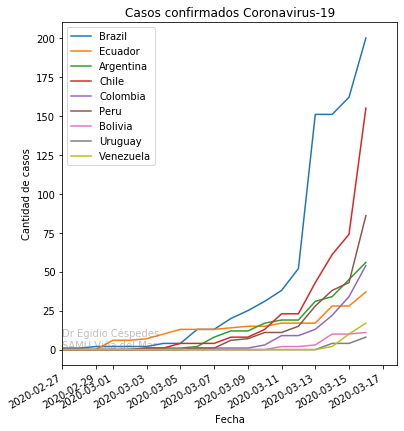

In [10]:
PAIS_Interes = confirmados.loc[
    confirmados['Country/Region'].isin(paises)].set_index('Country/Region')[fechas].T.copy()

dumm = PAIS_Interes

# Formato
dumm.plot(figsize=(6,7))
plt.legend(loc='upper left')
plt.title('Casos confirmados Coronavirus-19')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.text(f_inicio, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar',
         fontsize=10,color='gray', alpha=0.5)

# fecha de interés
f_fin = dt.datetime.now()
f_inicio = dt.datetime(2020,2,27)
plt.xlim(f_inicio, f_fin)


# escala logaritmica
# plt.yscale('log')
# plt.ylabel('Cantidad de casos en log')

## America

In [11]:
paises_LA = list(['Argentina', 'Chile', 'Peru', 'Venezuela',
                  'Brazil', 'Mexico', 'Ecuador', 'Colombia',
                  'Bolivia', 'Cuba', 'Uruguay', 'Guatemala',
                  ])
paises = paises_LA

Text(0.5, 1.0, 'Casos confirmados Coronavirus-19')

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cantidad de casos')

Text(2020-02-27 00:00:00, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar')

(737482.0, 737501.8533020932)

Text(0, 0.5, 'Cantidad de casos en log')

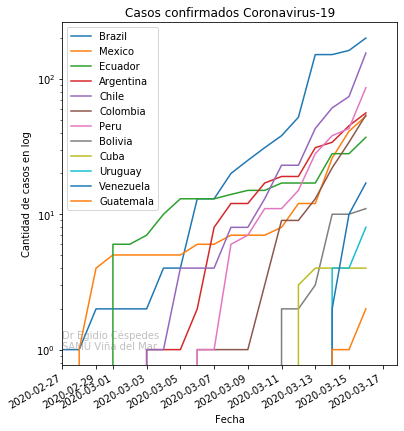

In [12]:
PAIS_Interes = confirmados.loc[
    confirmados['Country/Region'].isin(paises)].set_index('Country/Region')[fechas].T.copy()

dumm = PAIS_Interes

# Formato
dumm.plot(figsize=(6,7))
plt.legend(loc='upper left')
plt.title('Casos confirmados Coronavirus-19')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.text(f_inicio, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar',
         fontsize=10,color='gray', alpha=0.5)

# fecha de interés
f_fin = dt.datetime.now()
f_inicio = dt.datetime(2020,2,27)
plt.xlim(f_inicio, f_fin)


# escala logaritmica
plt.yscale('log')
plt.ylabel('Cantidad de casos en log')

## Paises de interés

In [13]:
paises = list(['Spain', 'Italy', 'Chile', 'Korea, South',
                       'Peru', 'Argentina', 'Germany', 'Brazil'
                      ])
db = confirmados.groupby('Country/Region')[fechas].sum().T

Text(0.5, 1.0, 'Casos confirmados Coronavirus-19')

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Cantidad de casos')

Text(2020-02-27 00:00:00, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar')

(737482.0, 737501.8533117549)

Text(0, 0.5, 'Cantidad de casos en log')

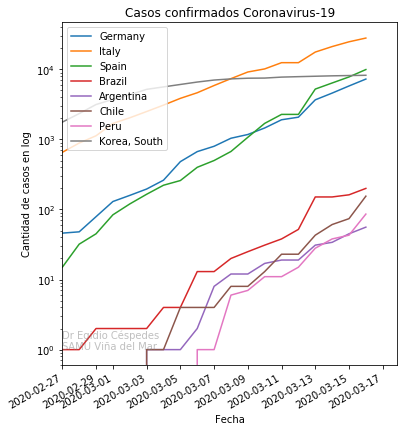

In [14]:
PAIS_Interes = confirmados.loc[
    confirmados['Country/Region'].isin(paises)].set_index('Country/Region')[fechas].T.copy()
dumm = PAIS_Interes

# Formato
dumm.plot(figsize=(6,7))
plt.legend(loc='upper left')
plt.title('Casos confirmados Coronavirus-19')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.text(f_inicio, 1, 'Dr Egidio Céspedes \nSAMU Viña del Mar',
         fontsize=10,color='gray', alpha=0.5)

# fecha de interés
f_fin = dt.datetime.now()
f_inicio = dt.datetime(2020,2,27)
plt.xlim(f_inicio, f_fin)


# escala logaritmica
plt.yscale('log')
plt.ylabel('Cantidad de casos en log')

In [16]:
# confirmados
confirmados.groupby('Country/Region').sum()[fechas].head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,4,4,5,7,7,7,11,16,21
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,2,10,12,23,33,38,42,51
Algeria,0,0,0,0,0,0,0,0,0,0,...,17,19,20,20,20,24,26,37,48,54
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
